[数据集](https://www.kaggle.com/ronitf/heart-disease-uci)。

[参考](https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning)。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

print(os.listdir("../input"))

['heart.csv']


In [3]:
df = pd.read_csv("../input/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# 一共 303 个数据，13 个特征
df.shape

(303, 14)

In [5]:
# 是一个二分类问题
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

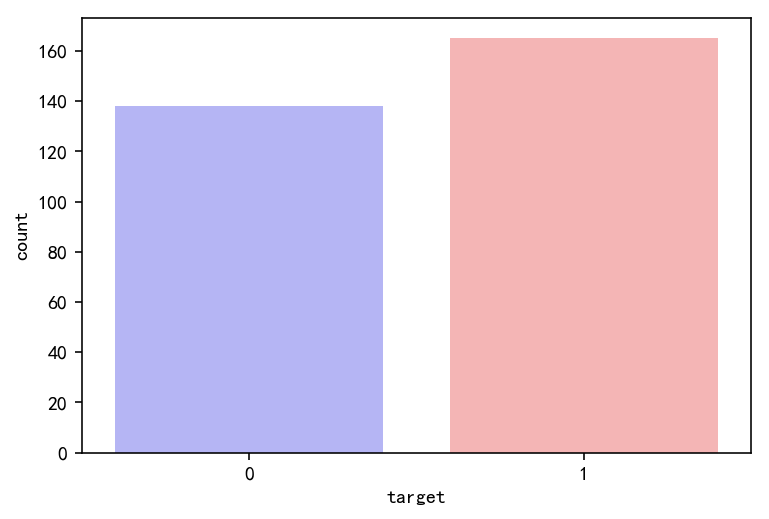

In [6]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [7]:
# normalize=True 计算百分比
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

## EDA

In [8]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

只统计了性别。

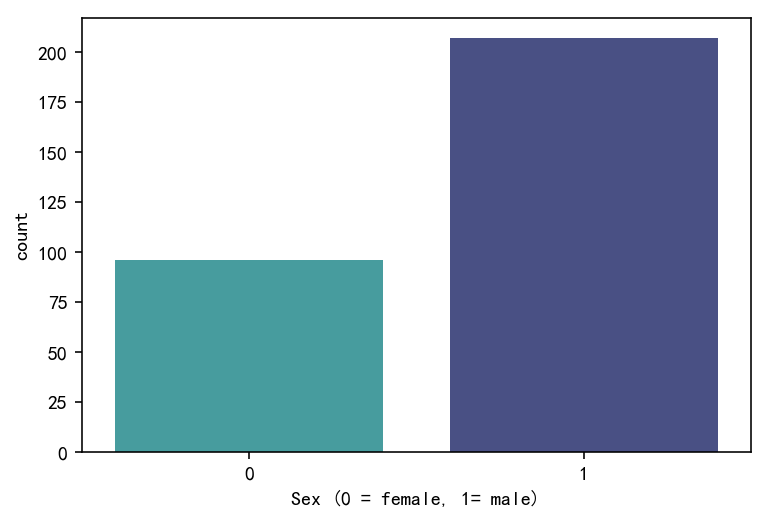

In [9]:
# palette 是调色板的意思
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

### 年龄

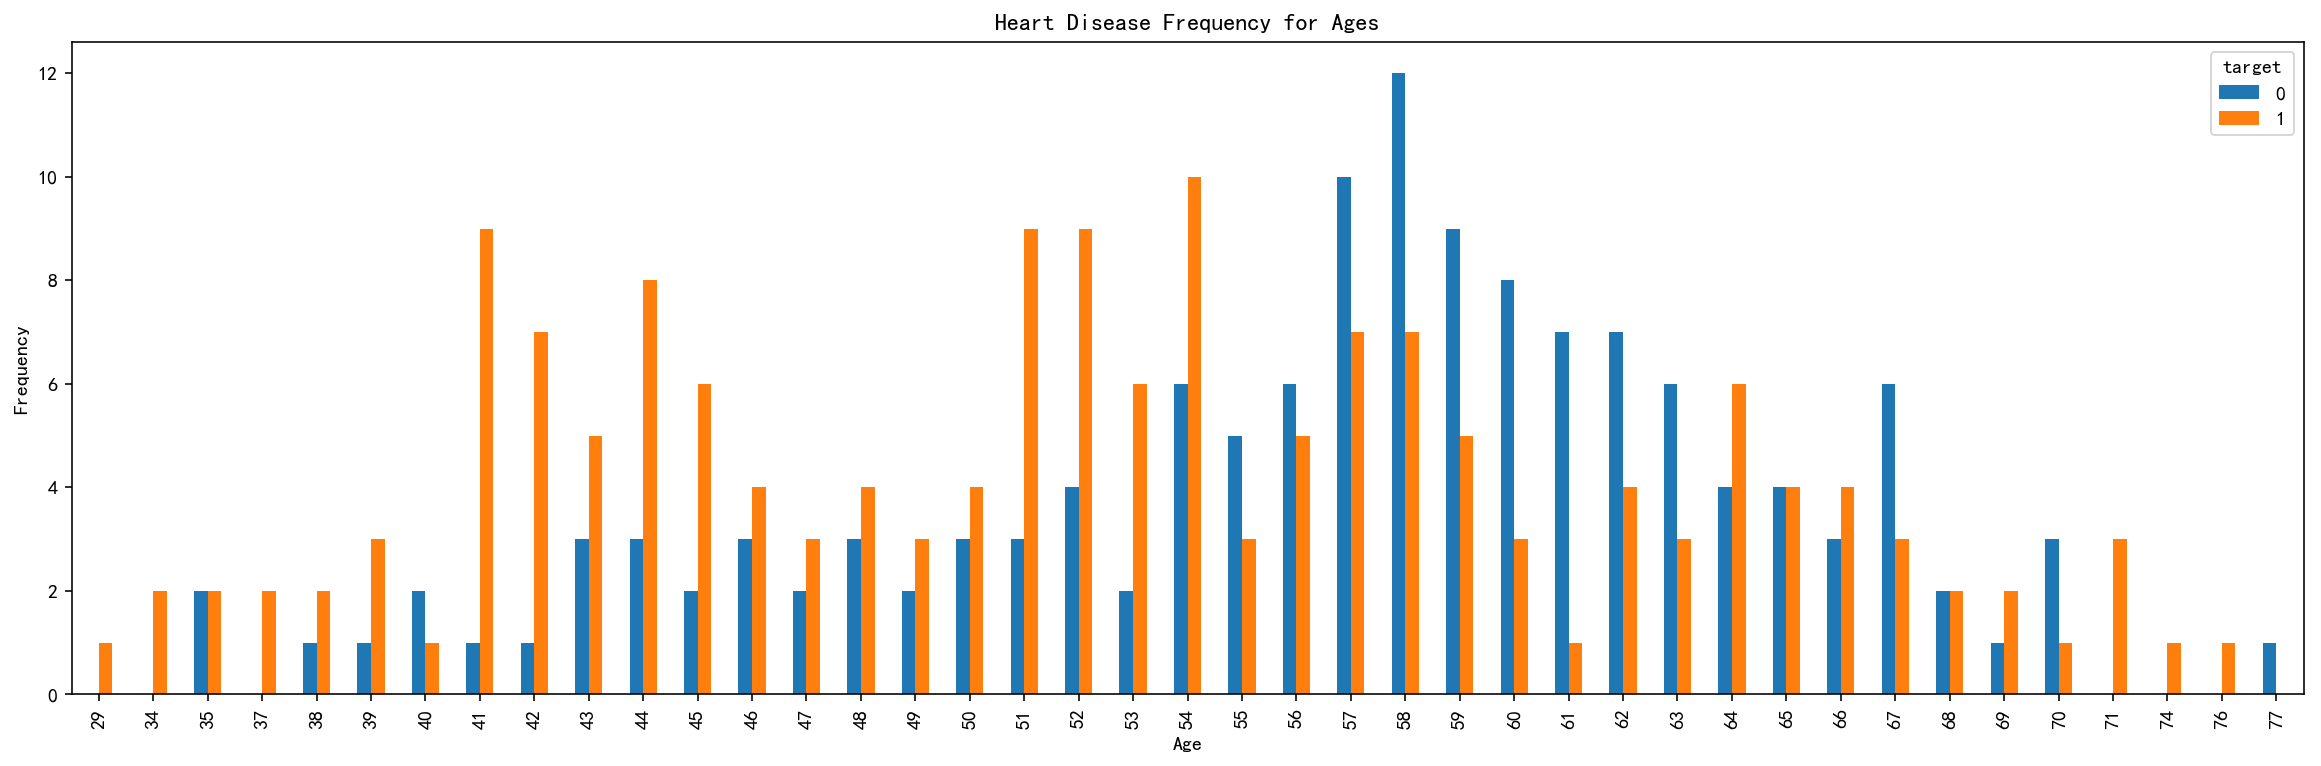

In [10]:
# 看一看年龄对心脏病是否有影响
pd.crosstab(df.age, df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
# plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [11]:
from scipy.stats import chi2_contingency

chi2_contingency(pd.crosstab(df.age, df.target))[1]

0.1309121880076365

### 性别

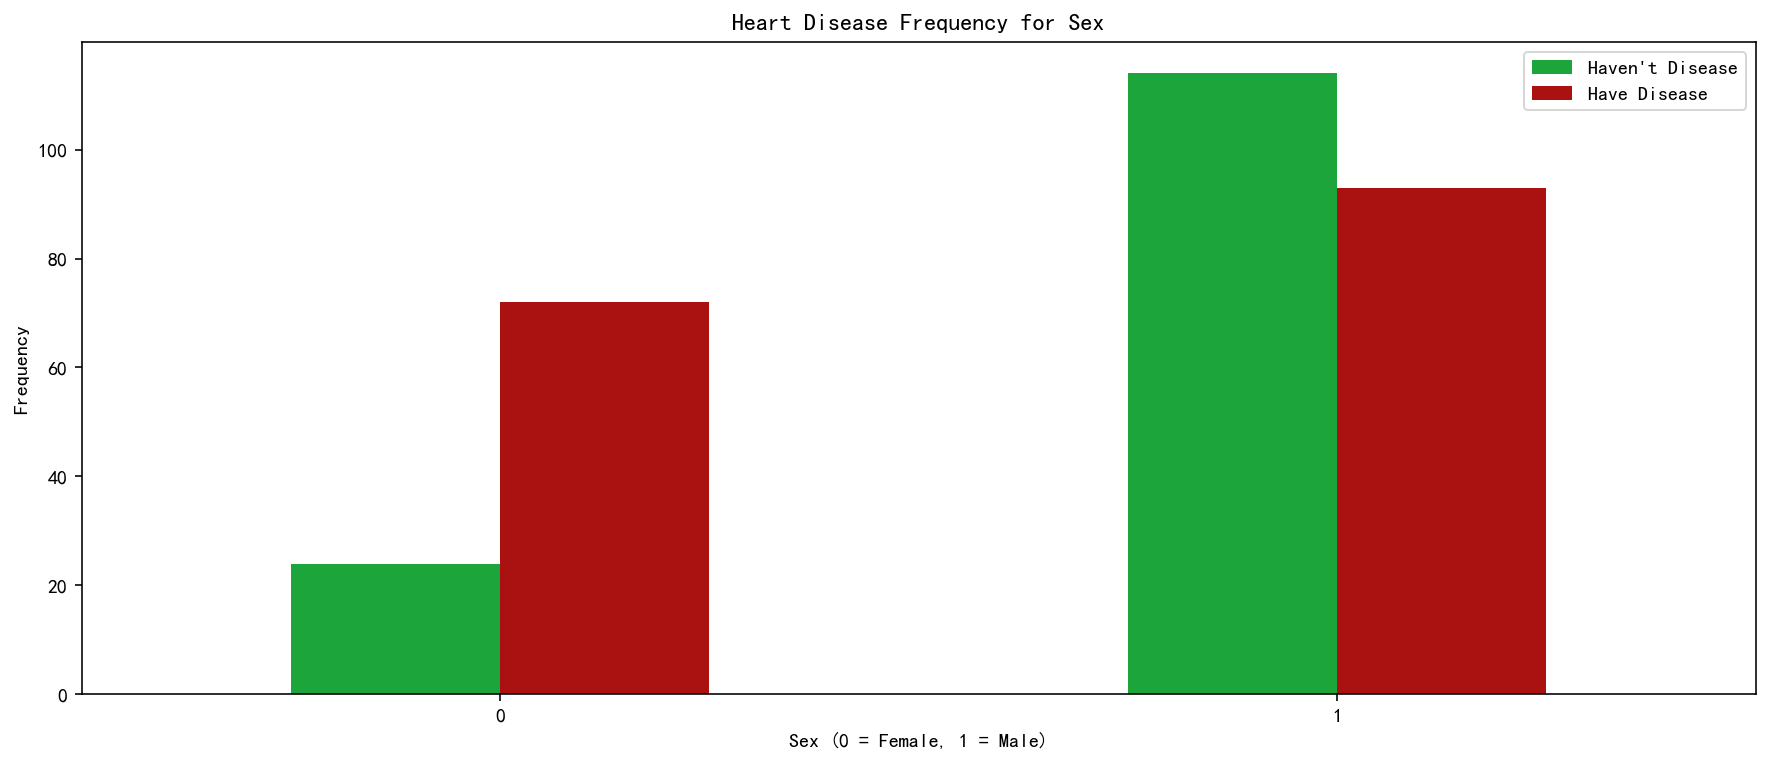

In [12]:
pd.crosstab(df.sex, df.target).plot(
    kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [13]:
from scipy.stats import chi2_contingency

chi2_contingency(pd.crosstab(df.sex, df.target))[1]

1.8767776216941503e-06

性别对是否得病有显著影响。

女性中，健康的人占少数；男性中，健康的占多数。

### thalach

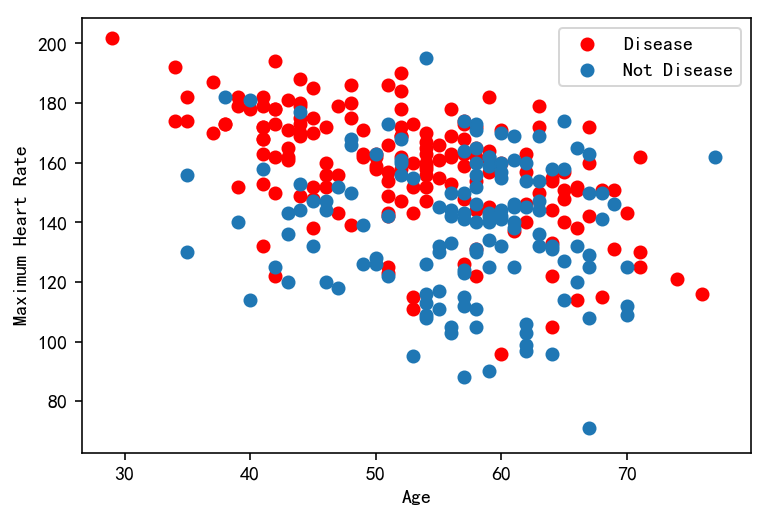

In [14]:
# thalach 达到最大心率
plt.scatter(x=df.age[df.target == 1], y=df.thalach[(df.target == 1)], c="red")
plt.scatter(x=df.age[df.target == 0], y=df.thalach[(df.target == 0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [15]:
from scipy.stats import chi2_contingency

chi2_contingency(pd.crosstab(df.thalach, df.target))[1]

0.07347837419093241

### slope

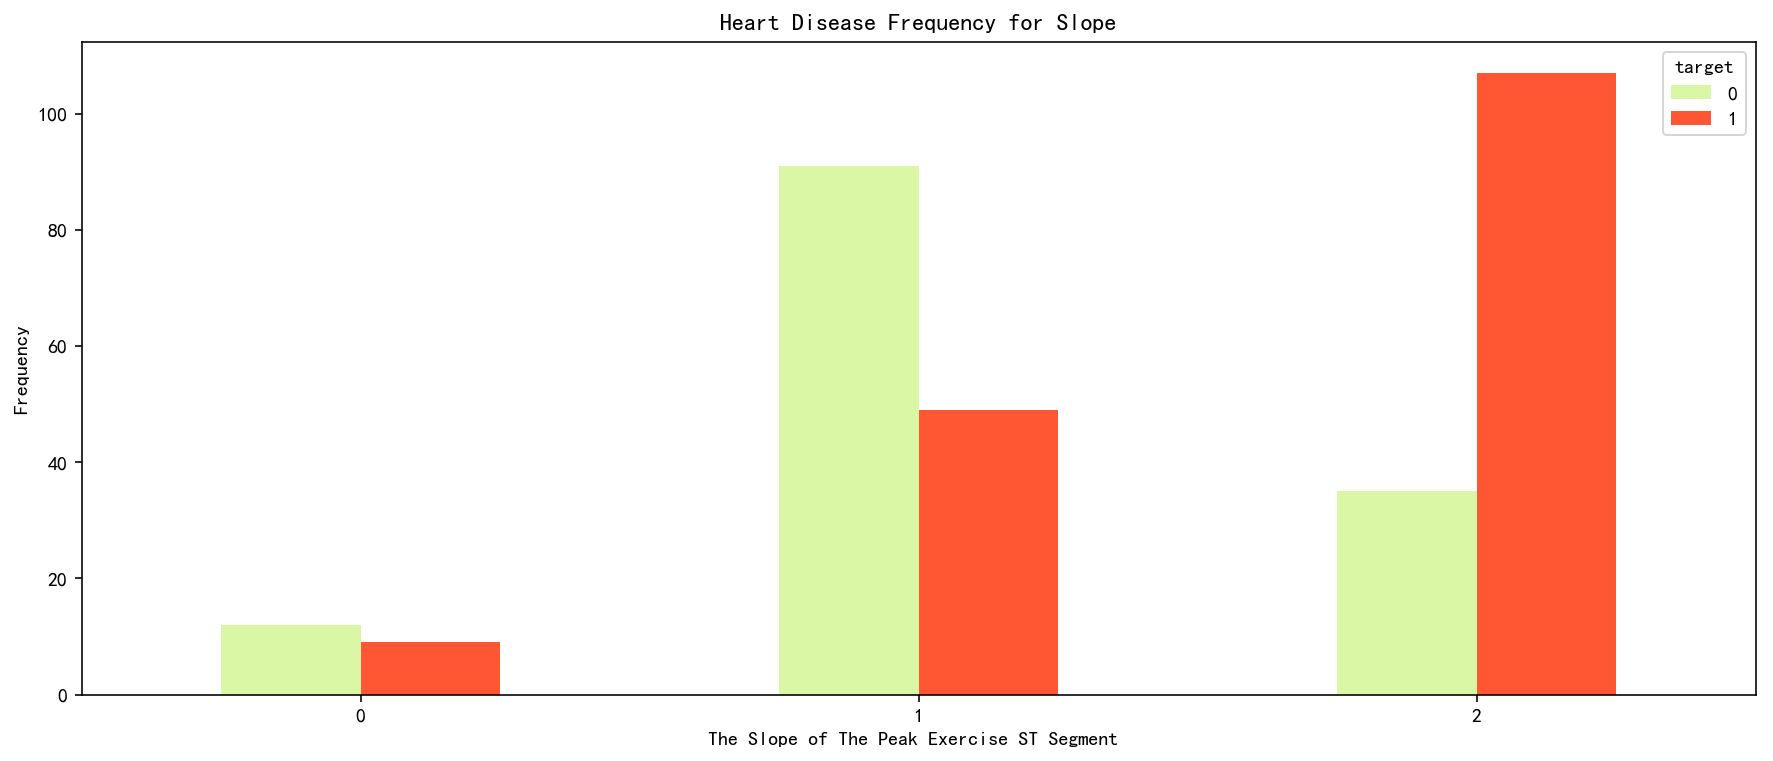

In [16]:
pd.crosstab(df.slope, df.target).plot(
    kind="bar", figsize=(15, 6), color=['#DAF7A6', '#FF5733'])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [17]:
from scipy.stats import chi2_contingency

chi2_contingency(pd.crosstab(df.slope, df.target))[1]

4.830681934276837e-11

### fbs

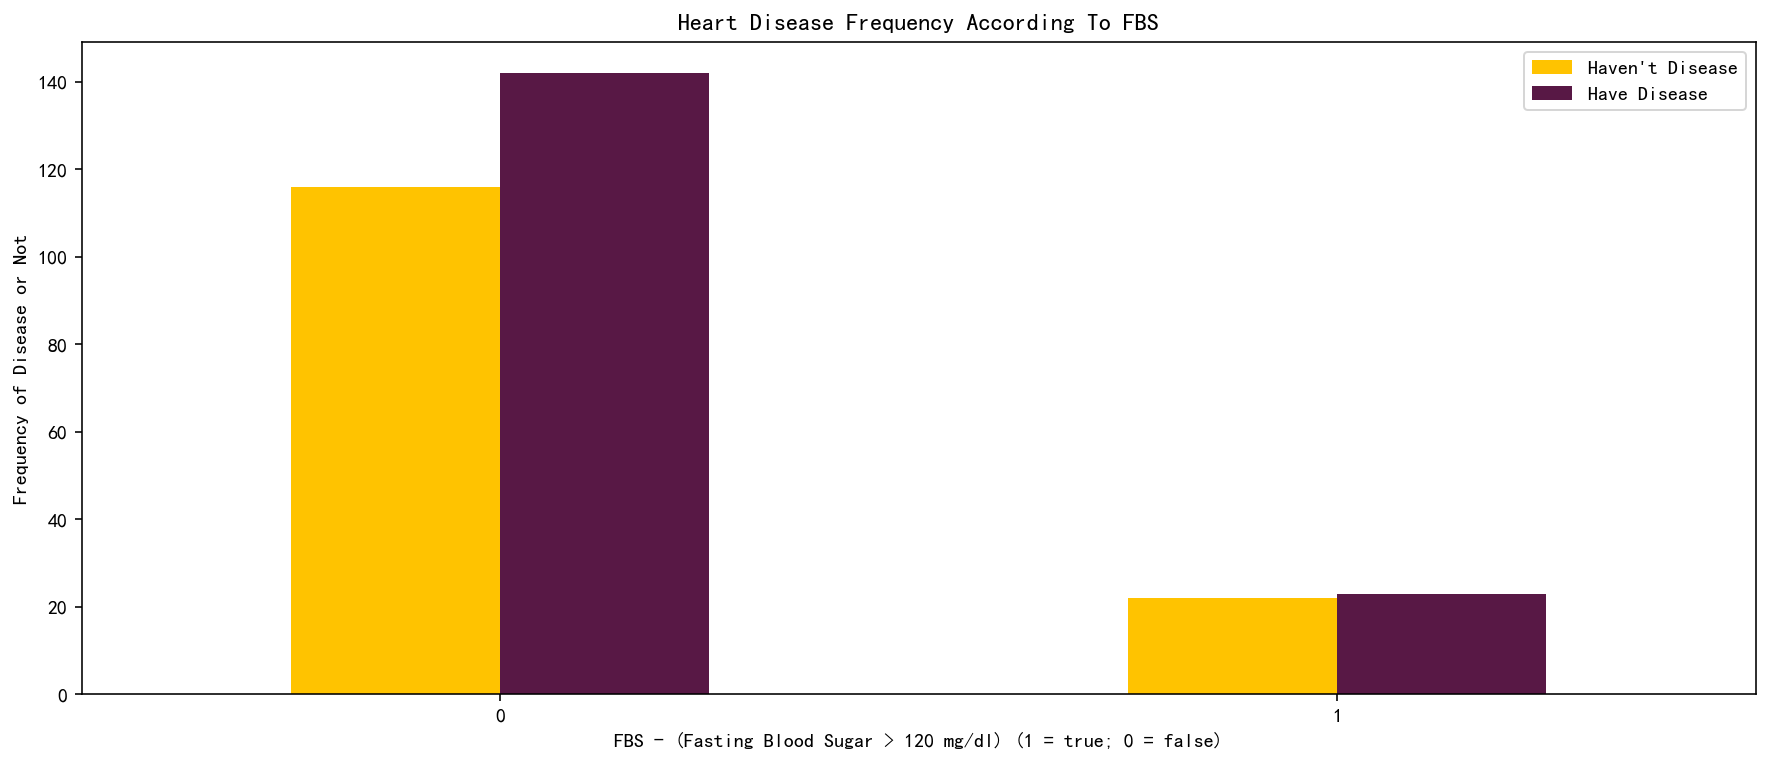

In [18]:
pd.crosstab(df.fbs, df.target).plot(
    kind="bar", figsize=(15, 6), color=['#FFC300', '#581845'])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [19]:
from scipy.stats import chi2_contingency

chi2_contingency(pd.crosstab(df.fbs, df.target))[1]

0.7444281114149577

### cp

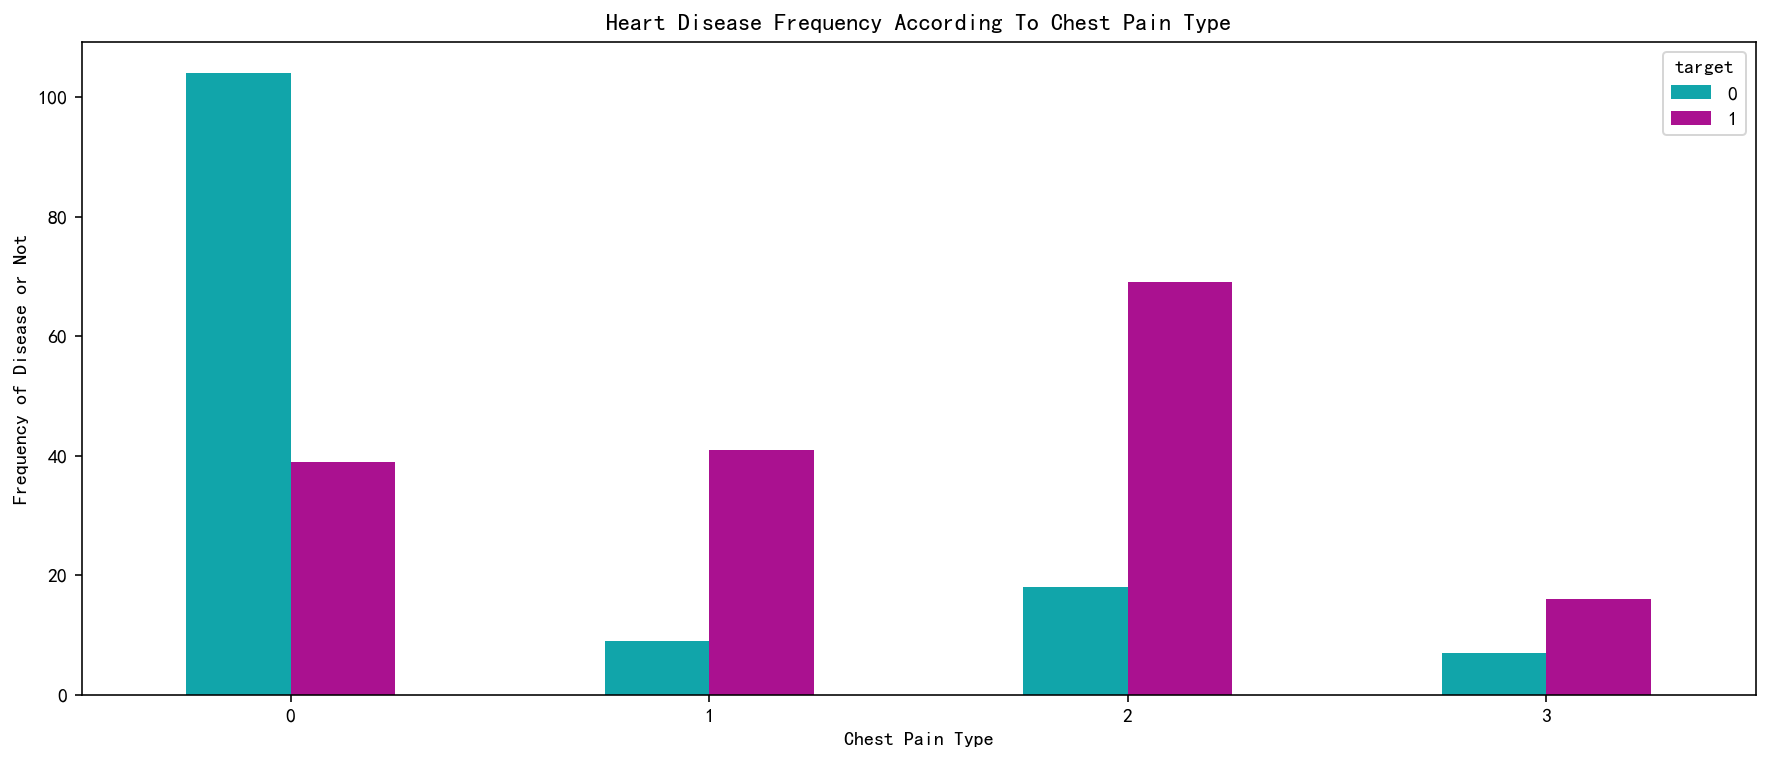

In [20]:
pd.crosstab(df.cp, df.target).plot(
    kind="bar", figsize=(15, 6), color=['#11A5AA', '#AA1190'])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [21]:
from scipy.stats import chi2_contingency

chi2_contingency(pd.crosstab(df.cp, df.target))[1]

1.3343043373050064e-17

### 处理类别变量

In [22]:
a = pd.get_dummies(df['cp'], prefix="cp")
b = pd.get_dummies(df['thal'], prefix="thal")
c = pd.get_dummies(df['slope'], prefix="slope")

In [23]:
frames = [df, a, b, c]
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [24]:
df = df.drop(columns=['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


## 模型训练

In [25]:
y = df.target.values
x_data = df.drop(['target'], axis=1)

### 数据标准化

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = scaler.fit_transform(x_data)

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaler, y, test_size=0.2, random_state=666)

In [28]:
def classifier(model):
    model.fit(X_train, y_train)
    print('train score', model.score(X_train, y_train))
    print('test score', model.score(X_test, y_test))

### 逻辑回归

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='sag')
classifier(lr)

train score 0.8884297520661157
test score 0.7377049180327869


过拟合比较严重。

### k 近邻

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
classifier(knn)

train score 0.8884297520661157
test score 0.7868852459016393


过拟合更严重了。

In [31]:
# 交叉验证选最好的超参数

### 支持向量机

In [32]:
from sklearn.svm import SVC

svm = SVC(random_state=666, gamma='scale')
classifier(svm)

train score 0.9090909090909091
test score 0.7377049180327869


### 朴素贝叶斯

In [33]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
classifier(nb)

train score 0.6942148760330579
test score 0.5573770491803278


### 决策树

In [34]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
classifier(dtc)

train score 1.0
test score 0.6557377049180327


决策树过拟合很严重。

### 随机森林

In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000, random_state=666)
classifier(rfc)

train score 1.0
test score 0.7377049180327869


决策树和随机森林的准确率都达到了 $1$。

### GradientBoostingClassifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=1000, random_state=666)
classifier(gbc)

train score 1.0
test score 0.6557377049180327


### XGBClassifier

In [37]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
classifier(xgbc)

train score 0.9834710743801653
test score 0.6721311475409836
